

Dataset: Online Shoppers Purchasing Intention dataset
Aim: build a classification model that can predict whether or not an online shopper has
the intention to make a purchase
## Dataset composition
Type of variable: 
- Categorical → information on the type of the operating system, the region of the shopper, and whether or not the shopper was a returning visitor
- Continuous → information on the duration of the visit, the number of pages visited, and the exit rate, among others.
Dataset attributes: 
- *Administrative:* number of pages of the website related to the administrative section that the user visited
- *Administrative Duration:* total time spent by the user on the website's administrative pages
- *Informational:* number of pages of the website related to the informational section that the user visited
- *Informational Duration:* total time spent by the user on the website's informational pages
- *Product Related:* number of pages of the website related to the product that the user visited
- *Product Related Duration:* total time spent by the user on the website's product pages.
- *Bounce Rate:* percentage of visitors who enter the website and leave without viewing any other pages during that session.
- *Exit Rate:* percentage of visitors who leave the website from that page during that session
- *Page Value:* average value of the page that the user visited before landing on the goal page during that session
- *Special Day:* closeness of the visit to a special day such as Mother's Day or Valentine's day.
- *Month:* month of the year in which the visit took place
- *Operating System:* type of operating system used by the user
- *Browser:* type of browser used by the user.
- *Region:* region of the user
- *Traffic Type:* type of traffic through which the user reached the website.
- *Visitor Type:* type of visitor, i.e., new or returning.
- *Weekend:* categorical feature representing whether the visit took place on a weekend or not.
- *Revenue:* This is the target variable, a binary feature that indicates whether the visitor made a purchase or not

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



In [3]:
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("C:\\Users\\sahla\\Desktop\\online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

no null values

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


convert weekend and revenue columns in to integer type

In [10]:
for i in ["Revenue","Weekend"]:
    data[i] = data[i].astype(int)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [11]:
numeric_columns=list(data.select_dtypes(include = "number").columns)

In [12]:
non_numeric_columns=(data.select_dtypes(exclude="number").columns)
non_numeric_columns

Index(['Month', 'VisitorType'], dtype='object')

In [13]:
for i in non_numeric_columns:
    print(f"{i} : unique values ={data[i].unique()} ")
    print("*"*10)

Month : unique values =['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec'] 
**********
VisitorType : unique values =['Returning_Visitor' 'New_Visitor' 'Other'] 
**********


no garbage values found

# visualisations

revenue per month

In [17]:
monthly_revenue = data.groupby(["Month"])[["Revenue"]].agg("sum")
monthly_revenue

,Revenue
Month,
Aug,76
Dec,216
Feb,3
Jul,66
June,29
Mar,192
May,365
Nov,760
Oct,115


In [18]:
type(monthly_revenue)

pandas.core.frame.DataFrame

In [19]:
months = list(monthly_revenue.index)

In [20]:
revenue = list(monthly_revenue.iloc[: , 0 ])

In [21]:
import matplotlib.colors as mcolors

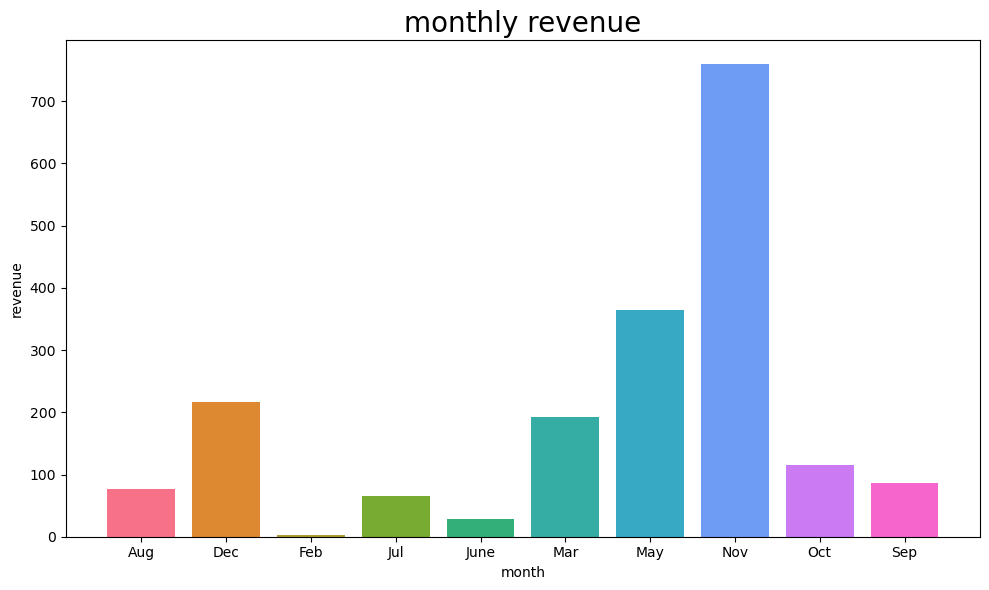

In [22]:
plt.figure(figsize = (10,6))
num_colors = 10
palette = sns.color_palette("husl", num_colors)  # HUSL stands for Hue-Saturation-Lightness
colors = [mcolors.rgb2hex(color) for color in palette]
plt.bar(months,revenue,color=colors)
plt.xlabel("month")
plt.ylabel("revenue")
plt.title("monthly revenue",fontsize=20)
plt.tight_layout()
plt.show()

highest revenue is in the month of november

revenue generated in weekends and weekdays

In [25]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [26]:
weekend_and_week_revenue = data.groupby(['Weekend'])[['Revenue']].agg("sum")
weekend_and_week_revenue 

,Revenue
Weekend,
0,1409
1,499


In [27]:
day = ["week day","weekend"]
revenue = list(weekend_and_week_revenue.iloc[:,0])

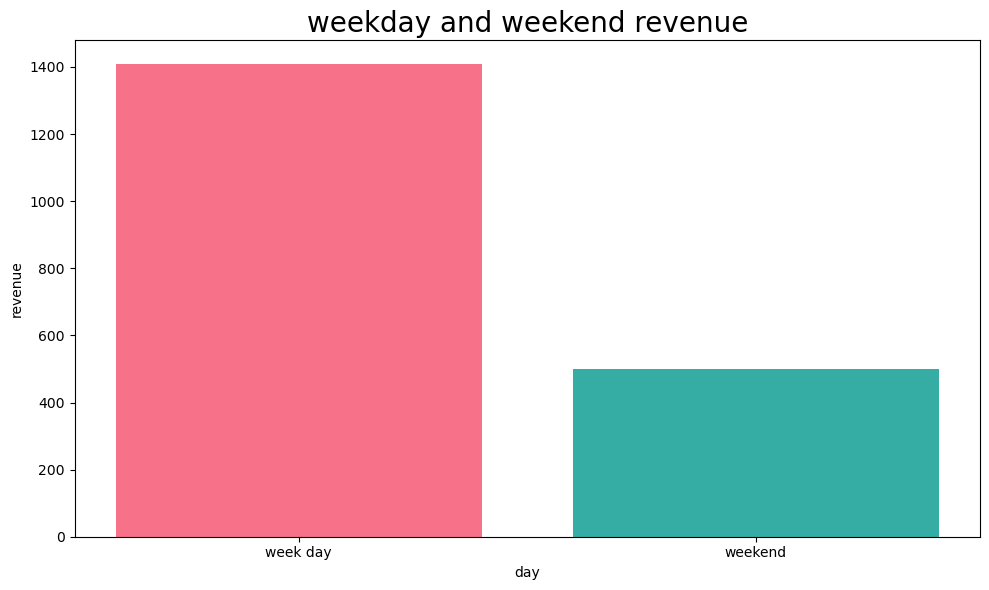

In [28]:
plt.figure(figsize = (10,6))
num_colors = 2
palette = sns.color_palette("husl", num_colors) 
colors = [mcolors.rgb2hex(color) for color in palette]
plt.bar(day,revenue,color=colors)
plt.xlabel("day")
plt.ylabel("revenue")
plt.title("weekday and weekend revenue",fontsize=20)
plt.tight_layout()
plt.show()

more revenue is generated in weekdays than weekends

special day feature

In [31]:
data["SpecialDay"].unique()

array([0. , 0.4, 0.8, 1. , 0.2, 0.6])

In [32]:
closeness_of_visit_in_special_day_df=data.groupby(['Month'])[["SpecialDay"]].agg("sum")

In [33]:
closeness_of_visit_in_special_day_df

,SpecialDay
Month,
Aug,0.0
Dec,0.0
Feb,43.0
Jul,0.0
June,0.0
Mar,0.0
May,714.4
Nov,0.0
Oct,0.0


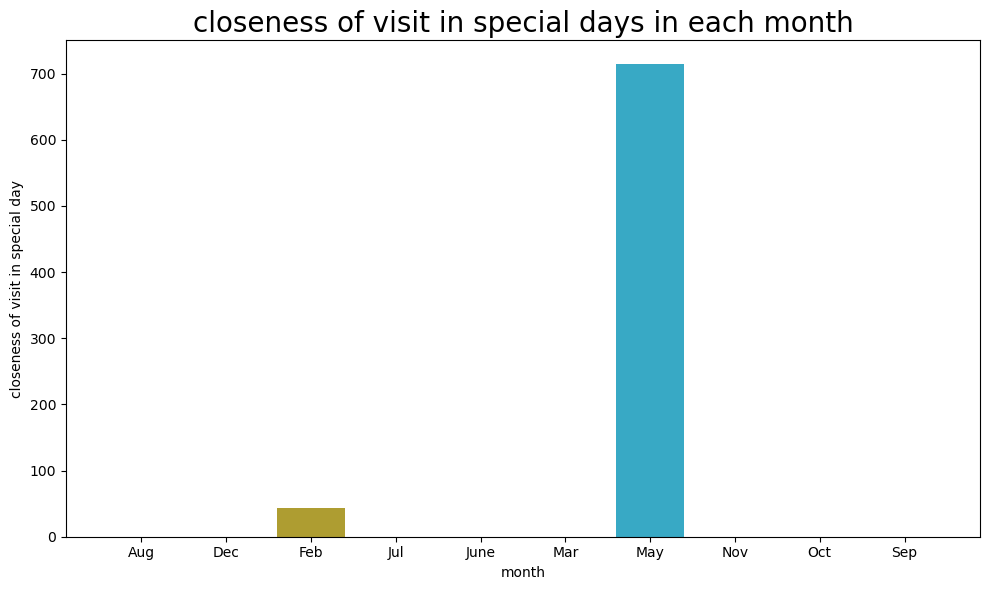

In [34]:
months = list(closeness_of_visit_in_special_day_df.index)
closeness_of_visit_in_special_day = list(closeness_of_visit_in_special_day_df.iloc[:,0])
plt.figure(figsize = (10,6))
num_colors = 10
palette = sns.color_palette("husl", num_colors) 
colors = [mcolors.rgb2hex(color) for color in palette]
plt.bar(months,closeness_of_visit_in_special_day,color=colors)
plt.xlabel("month")
plt.ylabel("closeness of visit in special day")
plt.title("closeness of visit in special days in each month",fontsize=20)
plt.tight_layout()
plt.show()

special day visit is present only in the month of feb and may and it is highest in may

# distribution plots for continuos columns

In [37]:
cont_col=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


In [38]:
def rugplot(col):
    plt.figure(figsize=(10,6))
    sns.rugplot(data=data,x=col,height=0.5,color="red")
    plt.xlabel(f"{i}")
    plt.title(f"{i} distribution",fontsize=20)
    plt.show()


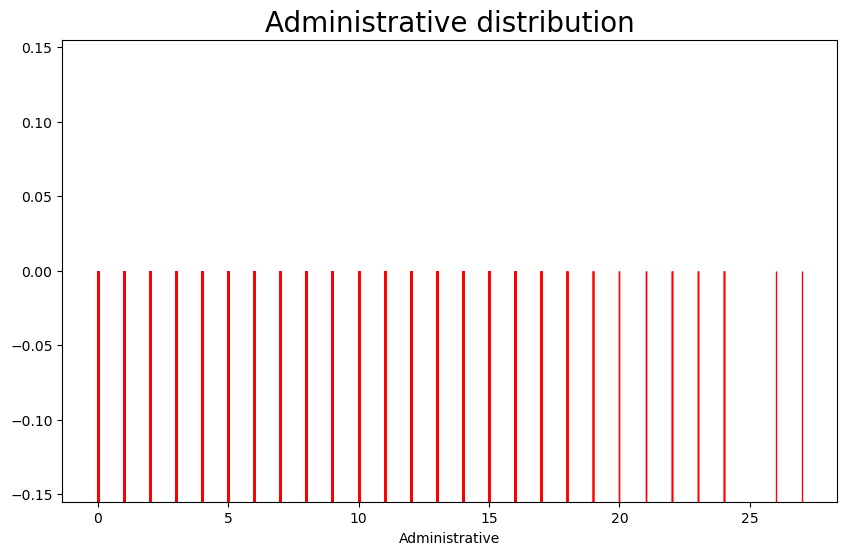

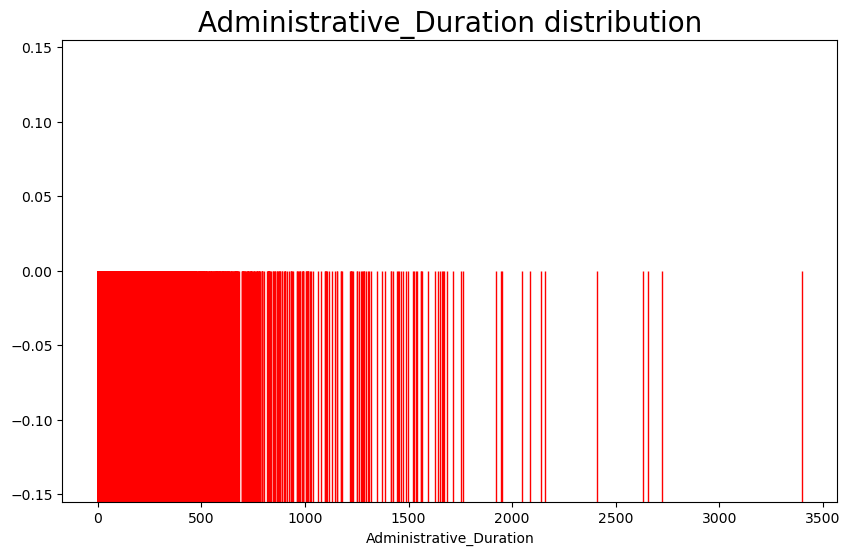

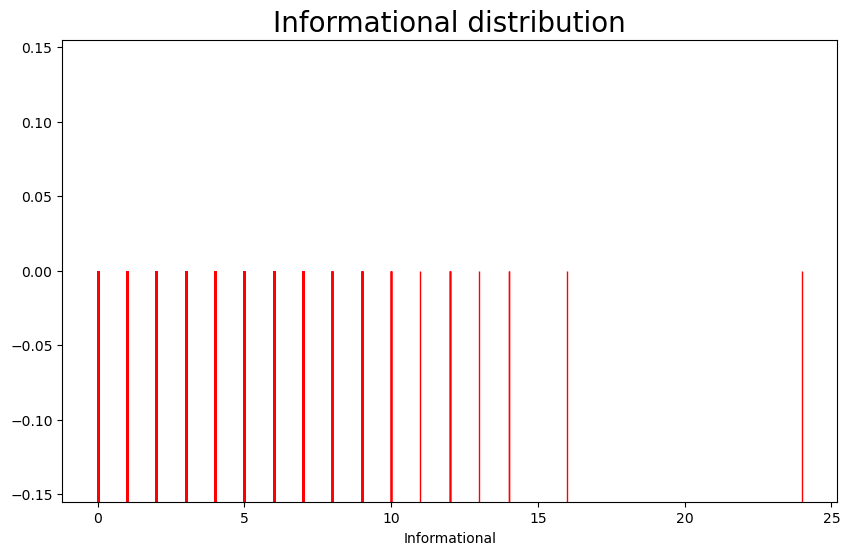

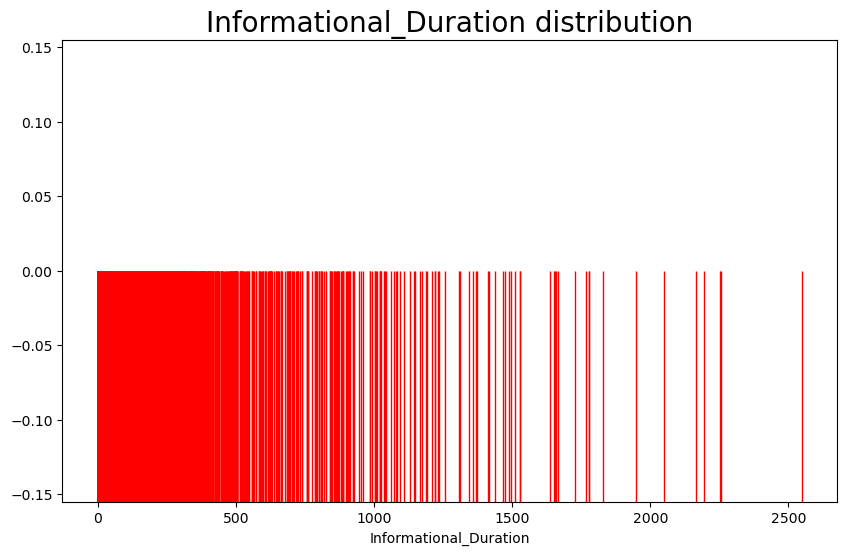

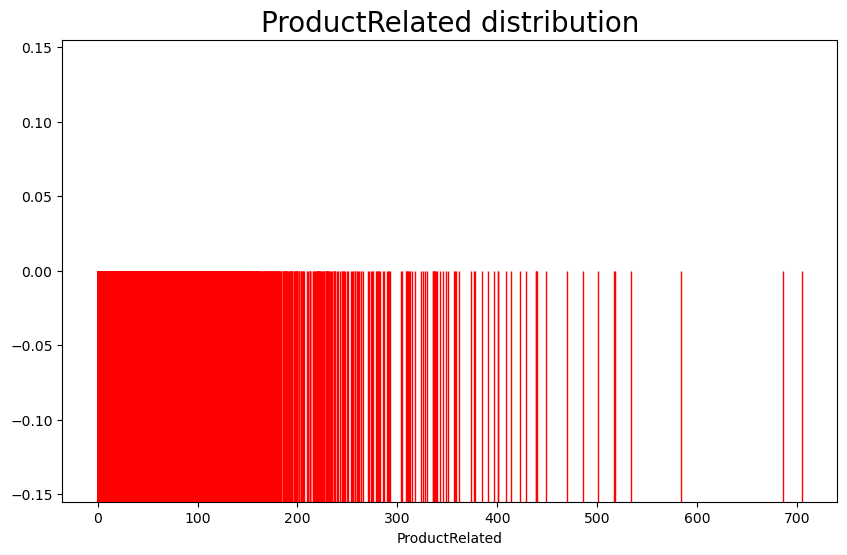

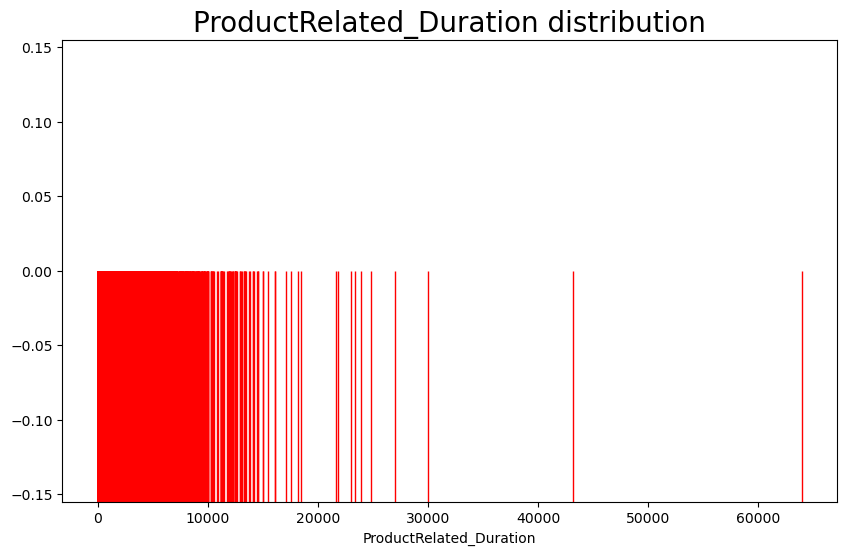

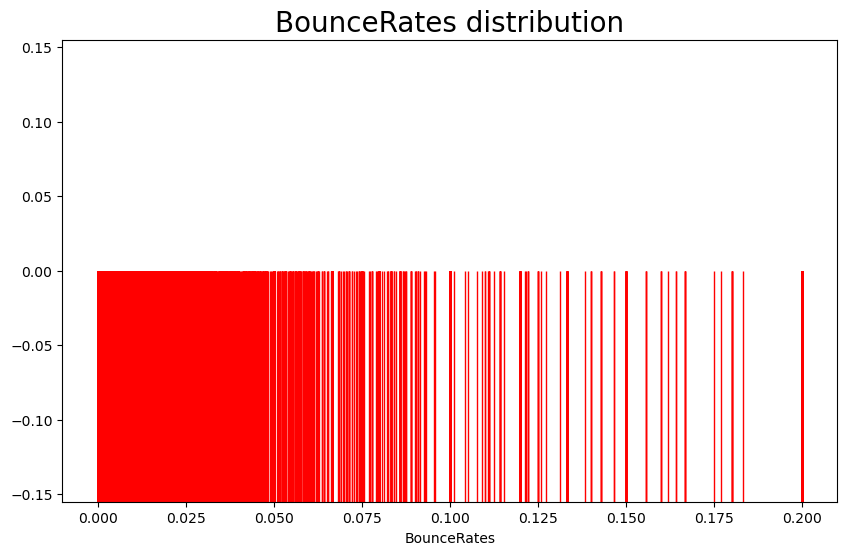

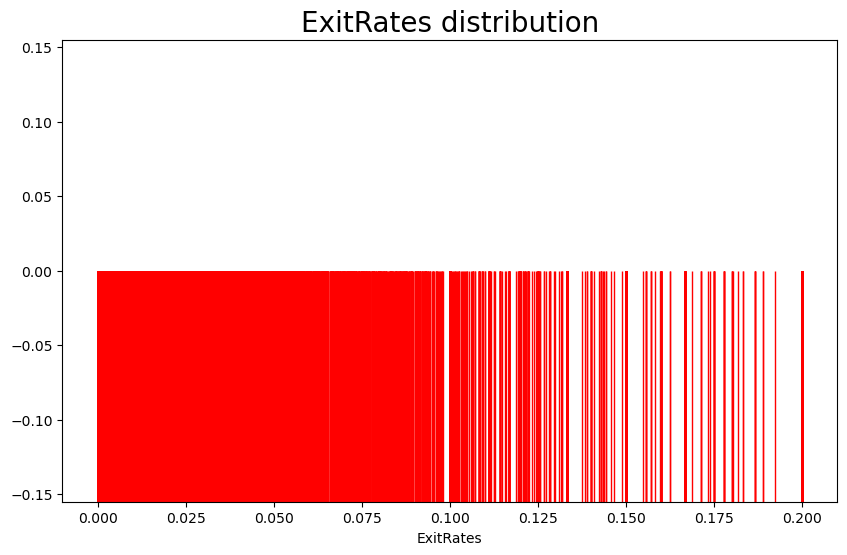

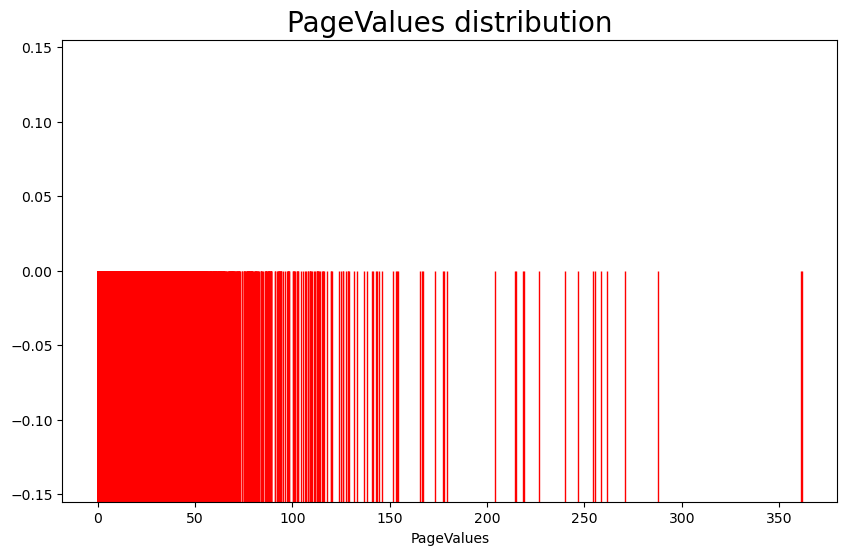

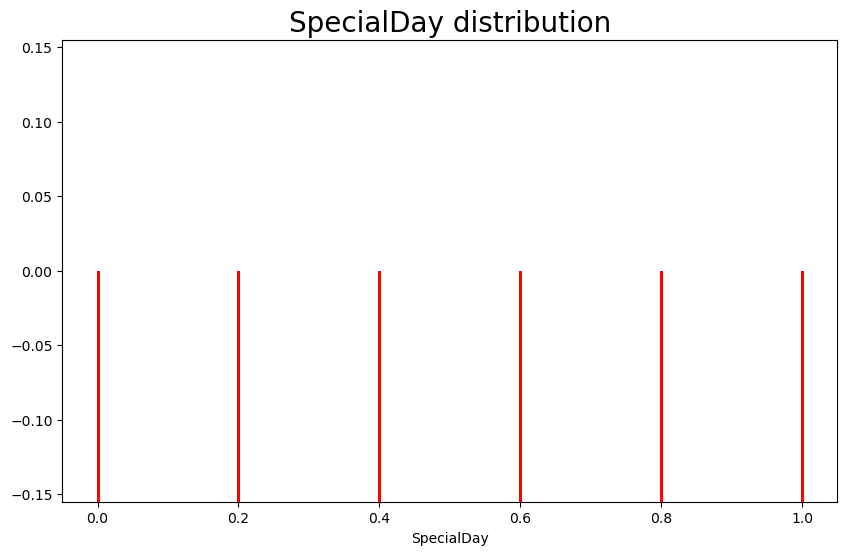

In [39]:
for i in cont_col:
    rugplot(i)

 # page duration vs revenue

In [41]:
revenue_df = data[data['Revenue']==1]
no_revenue_df = data[data['Revenue']==0]

In [42]:
    
def page_duration_vs_revenue(page):
    plt.figure(figsize=(10,6))
    plt.scatter(x=list(revenue_df[page]),y=list(revenue_df['Revenue']),color="red",alpha=0.08)
    plt.scatter(x=list(no_revenue_df[page]),y=list(no_revenue_df['Revenue']),color="green",alpha=0.08)
    plt.title(f"{page} duration vs revenue",fontsize=20)
    plt.xlabel(f"{page}")
    plt.ylabel("revenue generated or not")
    plt.show()


            



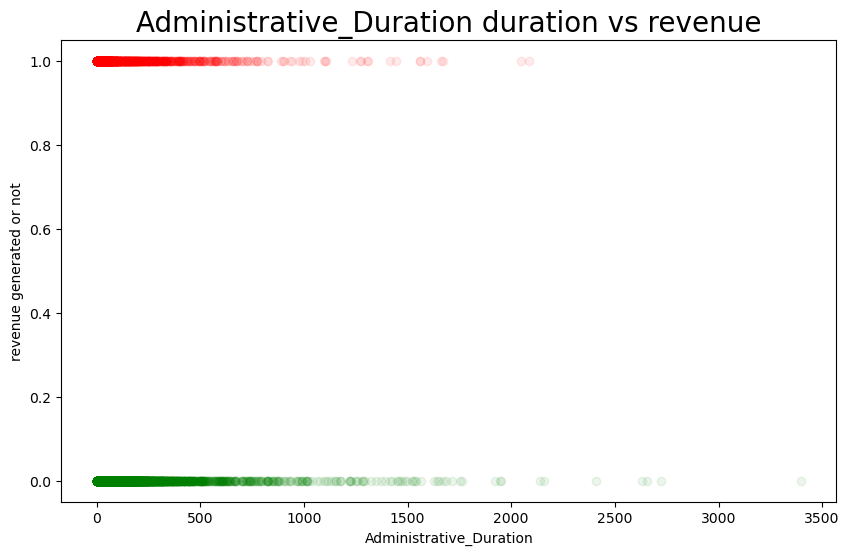

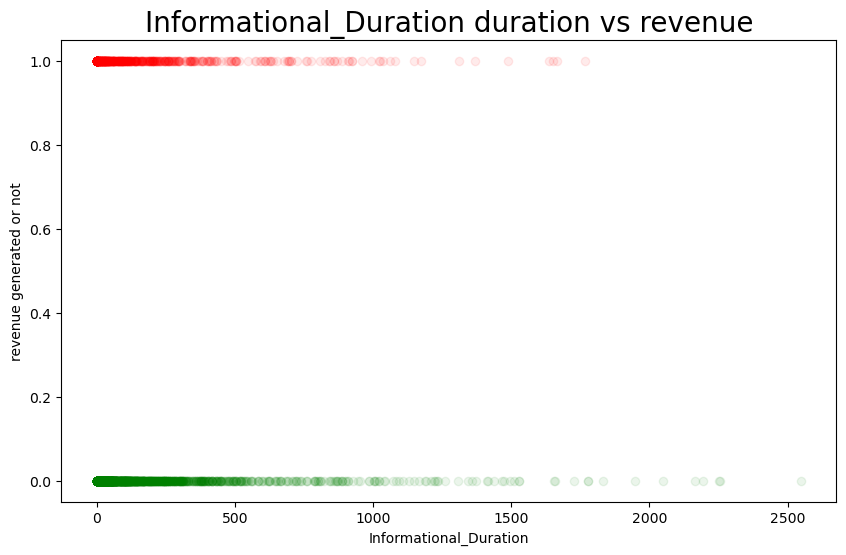

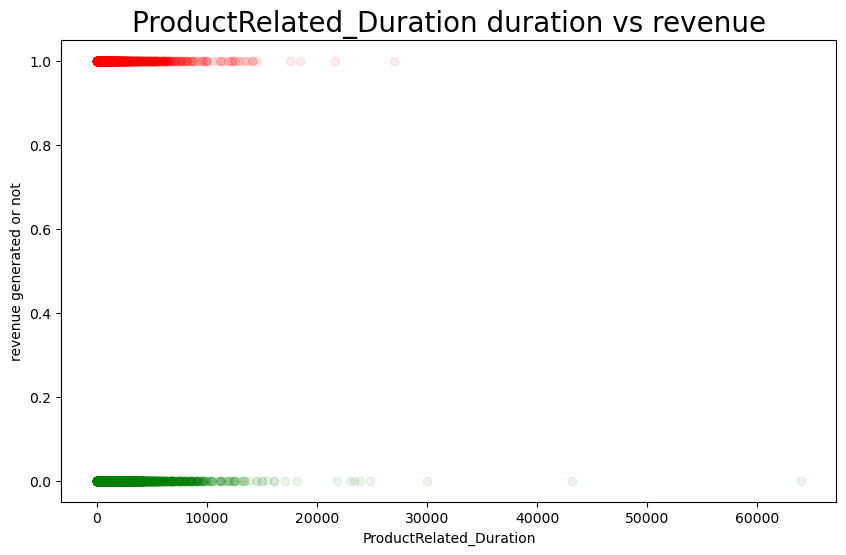

In [43]:
for i in ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']:
    page_duration_vs_revenue(i)
    

probability of both purchasing the product and not purchasing the product in all duration seems to be almost same

no of pages vs revenue

In [46]:
def page_no_vs_revenue(page):
    plt.figure(figsize=(10,6))
    plt.scatter(x=list(revenue_df[page]),y=list(revenue_df['Revenue']),color="red",alpha=0.08)
    plt.scatter(x=list(no_revenue_df[page]),y=list(no_revenue_df['Revenue']),color="green",alpha=0.08)
    plt.title(f"no of {page} page  vs revenue",fontsize=20)
    plt.xlabel(f"no of {page}")
    plt.ylabel("revenue generated or not")
    plt.show()

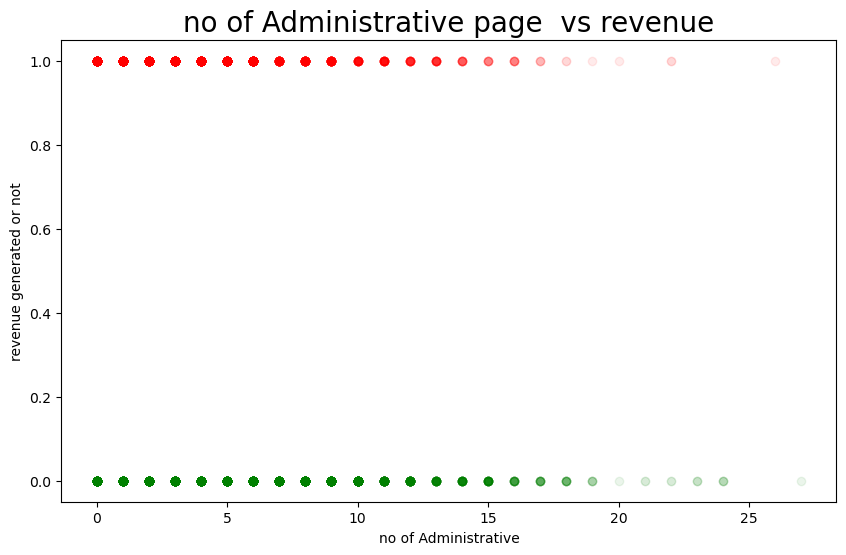

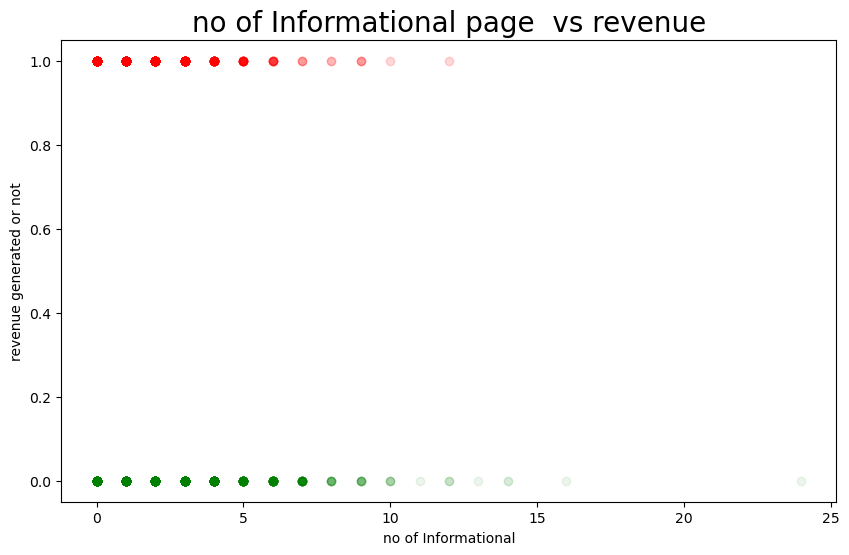

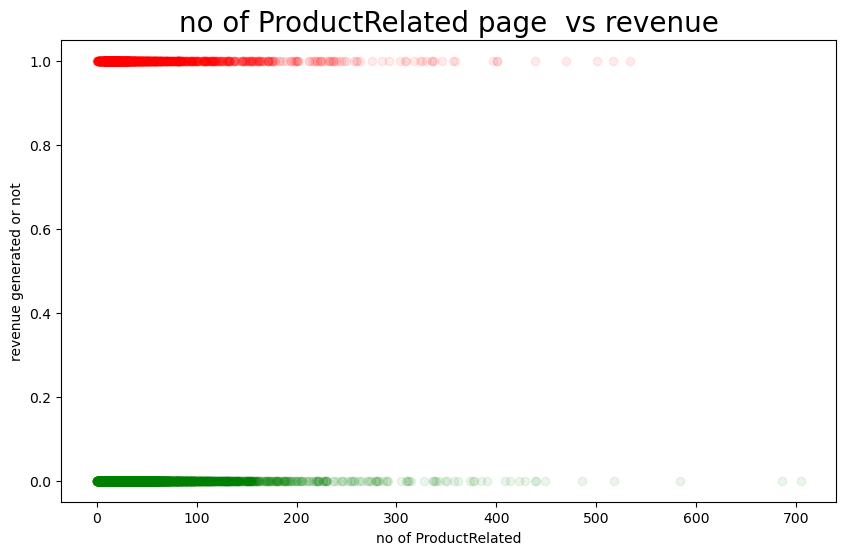

In [47]:
for i in ['Administrative','Informational','ProductRelated']:
    page_no_vs_revenue(i)

# 'BounceRates', 'ExitRates', 'PageValues' vs revenue

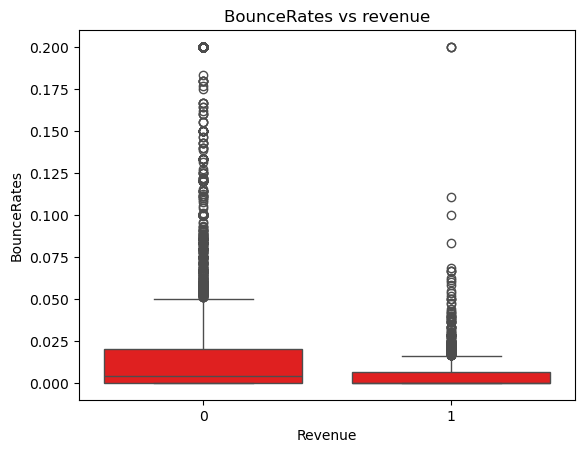

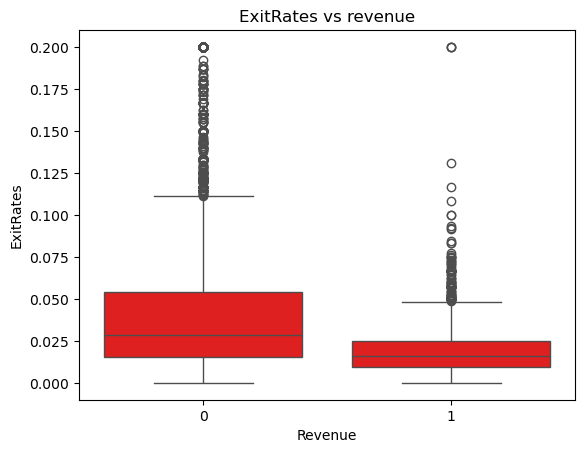

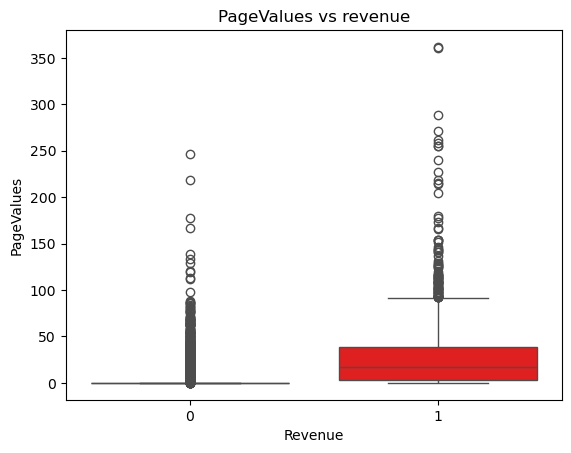

In [49]:
for i in ['BounceRates','ExitRates','PageValues']:
   sns.boxplot(data=data,x='Revenue',y=i,color="red")
   plt.title(f"{i} vs revenue")
   plt.show()


# 'OperatingSystems','Browser','Region','TrafficType','VisitorType' vs revenue

In [51]:
for i in ['OperatingSystems','Browser','Region','TrafficType','VisitorType']:
    print(f"{i} : {data[i].unique()}")
    print("*"*10)
    

OperatingSystems : [1 2 4 3 7 6 8 5]
**********
Browser : [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
**********
Region : [1 9 2 3 4 5 6 7 8]
**********
TrafficType : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
**********
VisitorType : ['Returning_Visitor' 'New_Visitor' 'Other']
**********


In [52]:
def revenue(col):
    revenue=data.groupby([col])[['Revenue']].agg("sum")
    categories=list(revenue.index)
    values=list(revenue.iloc[:,0])
    plt.figure(figsize = (10,6))
    num_colors = 20
    palette = sns.color_palette("husl", num_colors) 
    colors = [mcolors.rgb2hex(color) for color in palette]
    plt.bar(categories,values,color=colors,tick_label=categories)
    plt.xlabel(f"{col}")
    plt.ylabel("revenue")
    plt.title(f"{col} and revenue",fontsize=20)
    plt.tight_layout()
    plt.show()

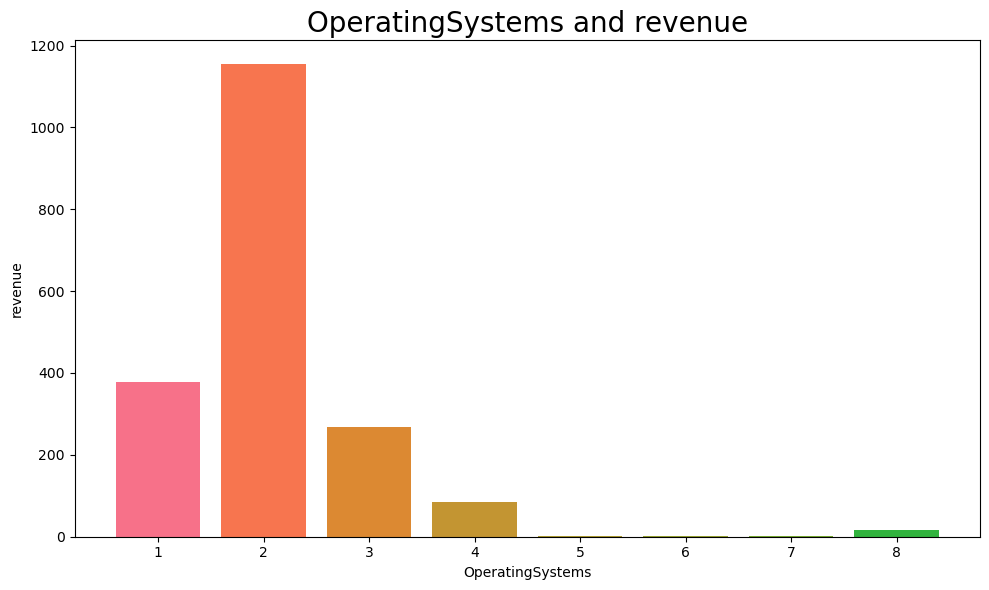

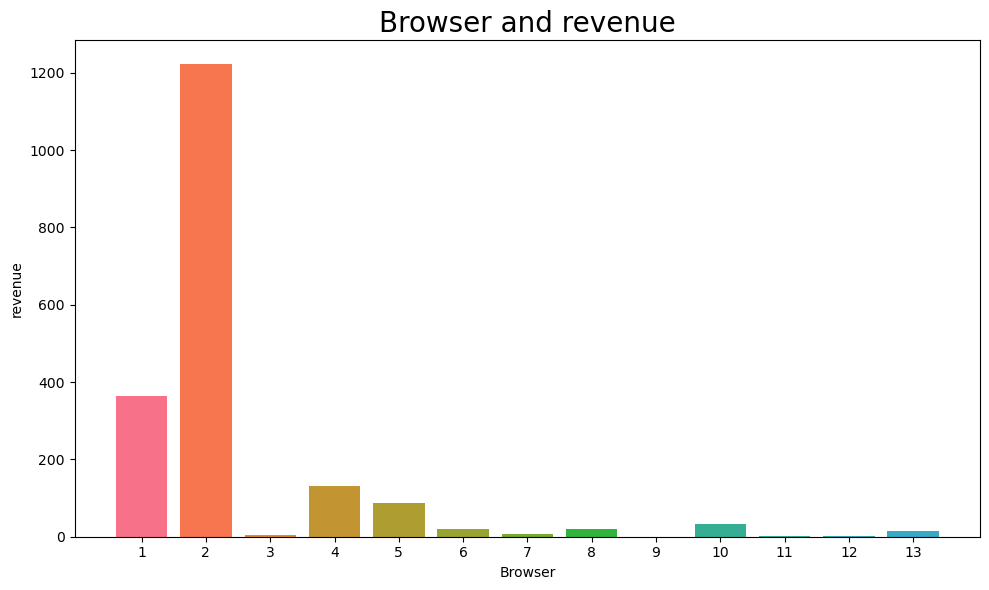

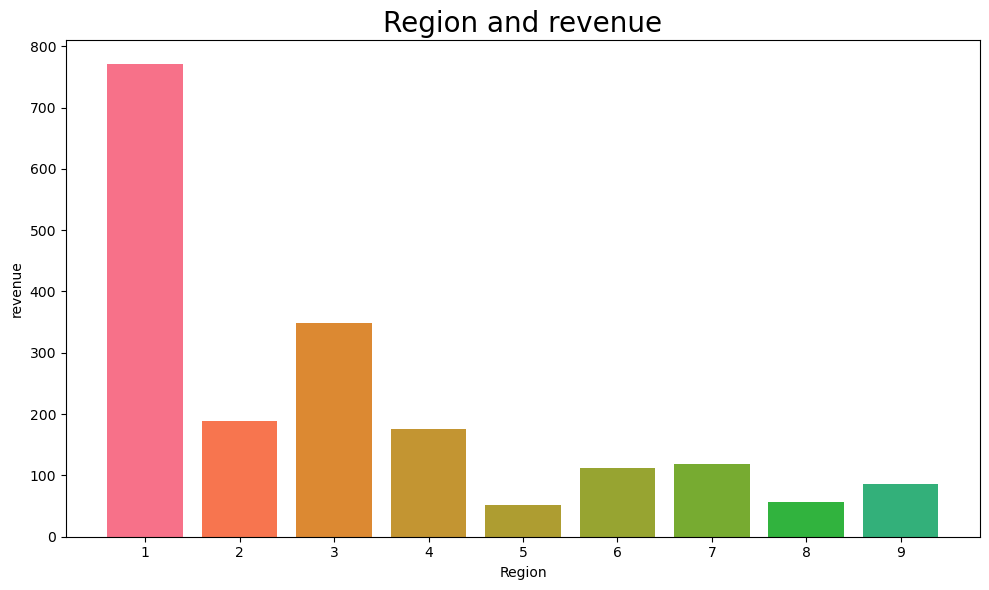

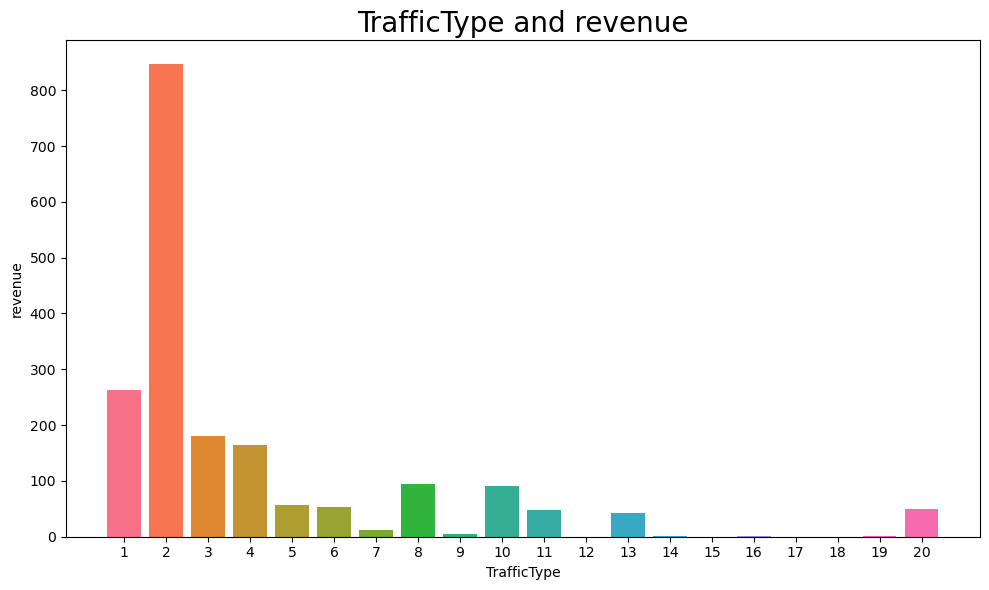

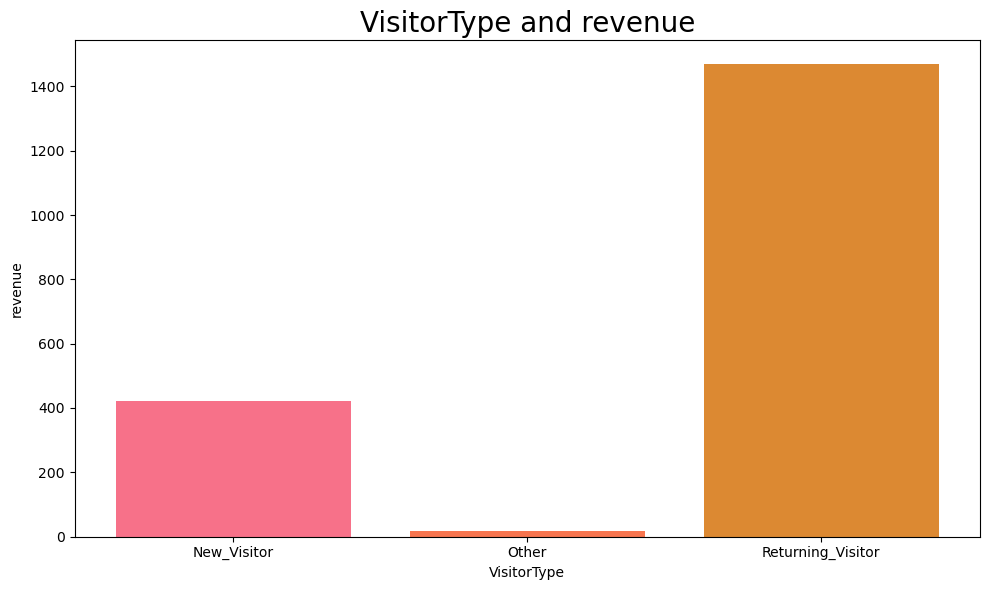

In [53]:
for col in ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']:
    revenue(col)

# visualising correlation

In [55]:
non_numeric_columns=data.select_dtypes(exclude="number")

In [56]:
for i in list(non_numeric_columns):
    print(data[i].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
['Returning_Visitor' 'New_Visitor' 'Other']


In [57]:
month_map={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
Visitor_map={'Returning_Visitor':1,'New_Visitor':2,'Other':3}

In [58]:
data['Month']=data['Month'].map(month_map)
data['VisitorType']=data['VisitorType'].map(Visitor_map)

In [59]:
for i in list(non_numeric_columns):
    print(data[i].unique())

[ 2  3  5 10  6  7  8 11  9 12]
[1 2 3]


In [60]:
for i in list(non_numeric_columns):
    data[i]=data[i].astype(int)

In [61]:
n=data.select_dtypes(exclude="number")
list(n)

[]

<Axes: >

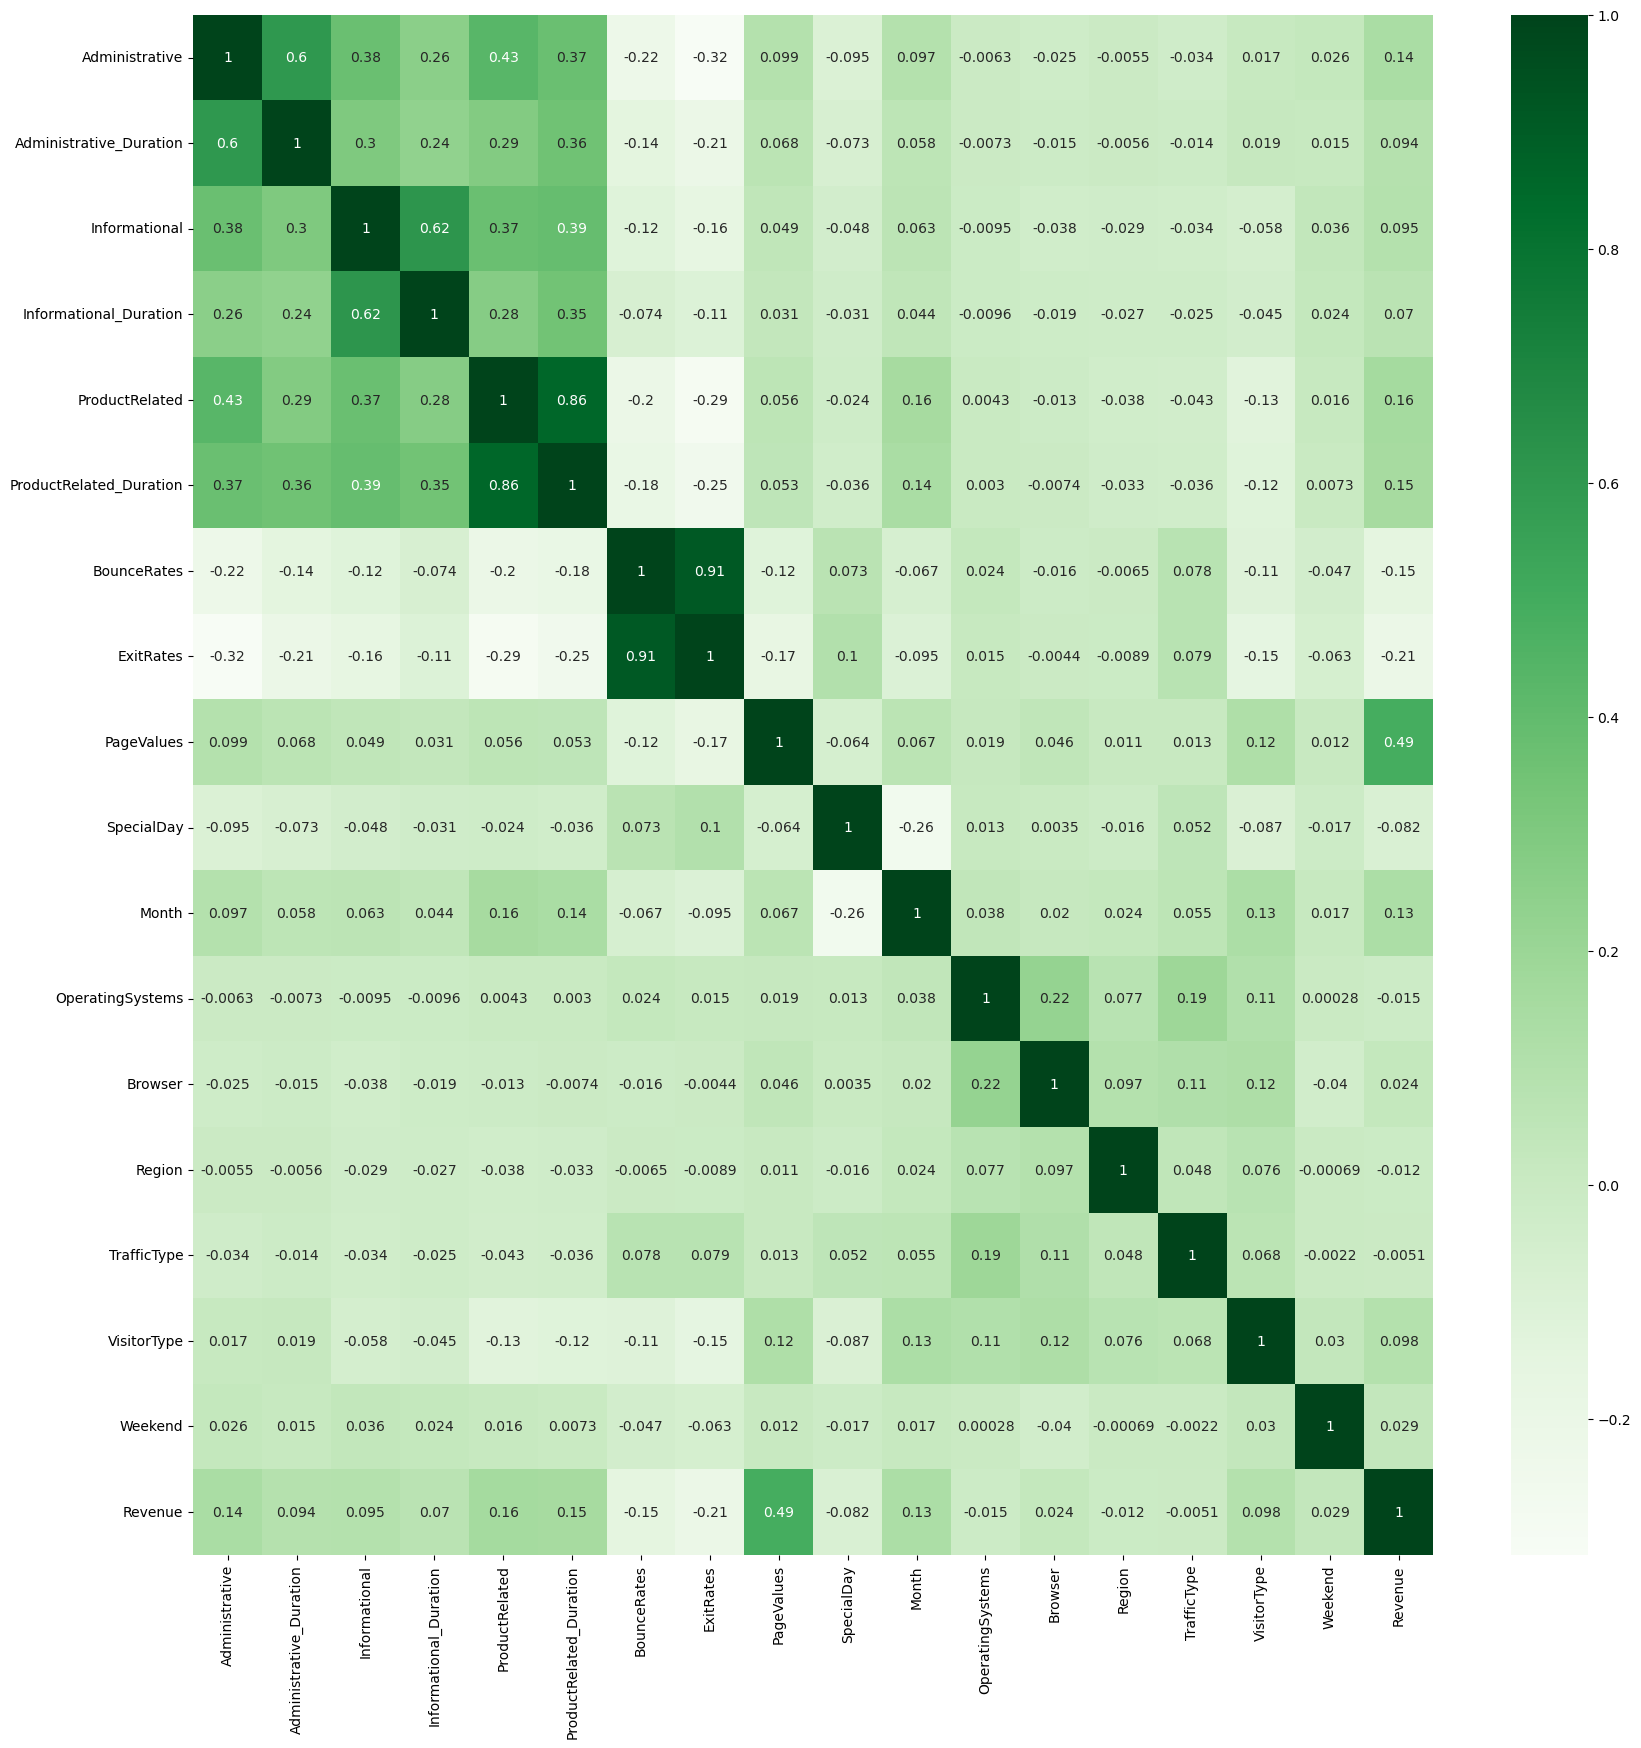

In [62]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap="Greens")

# outlier treatment

In [64]:
columns_for_outlier_treatment = [i for i in list(data.columns) if i not in ['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Revenue','Weekend']]

In [65]:
def whisker(col):
    q1,q3 = np.percentile(col,[25 ,75])
    iqr = q3-q1
    lw = q1-1.5*iqr
    uw = q3+1.5*iqr
    return lw ,uw

In [66]:
for i in columns_for_outlier_treatment:
    lw,uw = whisker(data[i])
    data[i]=np.where(data[i]<lw,lw,data[i])
    data[i]=np.where(data[i]>uw,uw,data[i])   

In [67]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.198783,2.924632,0.0,0.000000,1.000000,4.000000,10.000000
Administrative_Duration,12330.0,56.972776,79.250727,0.0,0.000000,7.500000,93.256250,233.140625
Informational,12330.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Informational_Duration,12330.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
ProductRelated,12330.0,26.696229,25.155967,0.0,7.000000,18.000000,38.000000,84.500000
ProductRelated_Duration,12330.0,989.691454,1033.120180,0.0,184.137500,598.936905,1464.157214,3384.186784
BounceRates,12330.0,0.010929,0.014875,0.0,0.000000,0.003112,0.016813,0.042031
ExitRates,12330.0,0.036452,0.030513,0.0,0.014286,0.025156,0.050000,0.103571
PageValues,12330.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
SpecialDay,12330.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [68]:
original_data=data.copy()

In [69]:
for i in list(data.columns):
    if data[i].mean()==0:
        data=data.drop(columns=[i])
    else:
        continue

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.198783,2.924632,0.0,0.000000,1.000000,4.000000,10.000000
Administrative_Duration,12330.0,56.972776,79.250727,0.0,0.000000,7.500000,93.256250,233.140625
ProductRelated,12330.0,26.696229,25.155967,0.0,7.000000,18.000000,38.000000,84.500000
ProductRelated_Duration,12330.0,989.691454,1033.120180,0.0,184.137500,598.936905,1464.157214,3384.186784
BounceRates,12330.0,0.010929,0.014875,0.0,0.000000,0.003112,0.016813,0.042031
ExitRates,12330.0,0.036452,0.030513,0.0,0.014286,0.025156,0.050000,0.103571
Month,12330.0,7.651987,3.392841,2.0,5.000000,7.000000,11.000000,12.000000
OperatingSystems,12330.0,2.124006,0.911325,1.0,2.000000,2.000000,3.000000,8.000000
Browser,12330.0,2.357097,1.717277,1.0,2.000000,2.000000,2.000000,13.000000
Region,12330.0,3.147364,2.401591,1.0,1.000000,3.000000,4.000000,9.000000


# feature selection

In [71]:
from sklearn.feature_selection import SelectKBest, f_classif , chi2

In [72]:
cat_col=['Month','OperatingSystems', 'Browser', 'Region','TrafficType', 'VisitorType','Weekend']
cont_col=["Administrative","Administrative_Duration","ProductRelated","ProductRelated_Duration","BounceRates","ExitRates"]
X_cat=data[cat_col]
X_cont=data[cont_col]
y=data['Revenue']

def feature_selector(test,X):
    selector = SelectKBest(test, k="all")
    X_new = selector.fit_transform(X, y)
    scores = pd.Series(selector.scores_, index=X.columns)
    p_values = pd.Series(selector.pvalues_, index=X.columns)
    print(f"{test} Scores: {scores}")
    print(f"P-values : {p_values}")

In [73]:
feature_selector(chi2,X_cat)

<function chi2 at 0x0000026DFD027A60> Scores: Month               300.903189
OperatingSystems      1.037132
Browser               8.873291
Region                3.037565
TrafficType           1.283194
VisitorType          14.763279
Weekend               8.120464
dtype: float64
P-values : Month               2.094103e-67
OperatingSystems    3.084894e-01
Browser             2.893730e-03
Region              8.135786e-02
TrafficType         2.573059e-01
VisitorType         1.218861e-04
Weekend             4.376835e-03
dtype: float64


In [74]:
for i in ["OperatingSystems","TrafficType","Region"]:
    data.drop(columns=[i],inplace=True)

In [75]:
feature_selector(f_classif,X_cont)

<function f_classif at 0x0000026DFD027880> Scores: Administrative             270.442365
Administrative_Duration    236.722586
ProductRelated             409.974515
ProductRelated_Duration    467.624271
BounceRates                415.400100
ExitRates                  749.469886
dtype: float64
P-values : Administrative              3.963462e-60
Administrative_Duration     6.320752e-53
ProductRelated              1.059335e-89
ProductRelated_Duration    8.115804e-102
BounceRates                 7.625978e-91
ExitRates                  3.066718e-160
dtype: float64


# splitting data in to dependent and independent features

In [77]:
X_data=data.drop("Revenue",axis=1)
y_data=data["Revenue"]

# target feature

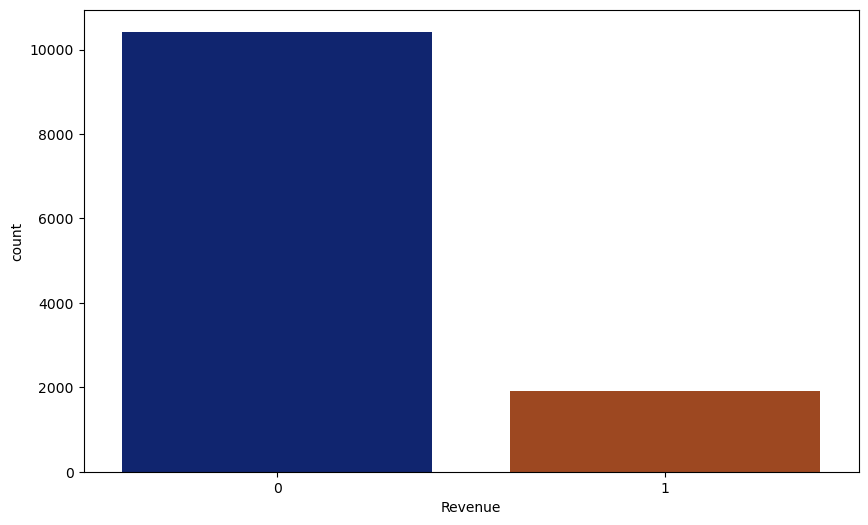

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(x='Revenue',data=data,palette="dark")
plt.show()

# splitting data into training and testing datasets

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=123)

In [82]:
for i in [X_train, X_test, y_train, y_test]:
    print(len(i))

8631
3699
8631
3699


# Treat class imbalance by using SMOTE

In [84]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



# scaling input features

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)
scaled_X_train_resampled=scaler.fit_transform(X_train_resampled)

# training model

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score


In [90]:
def evaluate_classifier(y_test,y_predict):
    acc_score=accuracy_score(y_test,y_predict)
    class_report=classification_report(y_test,y_predict)
    c_matrix=confusion_matrix(y_test,y_predict)
    plt.figure(figsize=(6,6))
    sns.heatmap(c_matrix,annot=True)
    plt.show()
    print(f"accuracy score : {acc_score}")
    print(f"classification_report : {class_report}")
    print(f"confusion_matrix : {c_matrix}")
    return

    

# naive bayes classifier

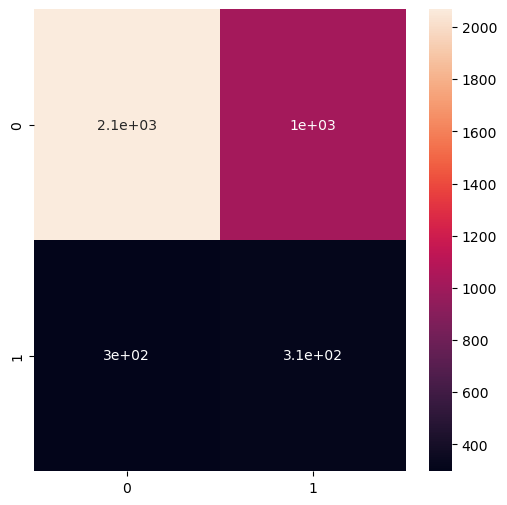

accuracy score : 0.6434171397675047
classification_report :               precision    recall  f1-score   support

           0       0.87      0.67      0.76      3090
           1       0.23      0.51      0.32       609

    accuracy                           0.64      3699
   macro avg       0.55      0.59      0.54      3699
weighted avg       0.77      0.64      0.69      3699

confusion_matrix : [[2068 1022]
 [ 297  312]]


In [92]:
gnb=GaussianNB()
y_predict=gnb.fit(X_train_resampled, y_train_resampled).predict(X_test)
evaluate_classifier(y_test,y_predict)


# random forest


In [94]:
def random_forest(X_train,y_train):
    rf=RandomForestClassifier(n_estimators=250)
    y_predict=rf.fit(X_train,y_train).predict(X_test)
    evaluate_classifier(y_test,y_predict)
    return

# with normal data

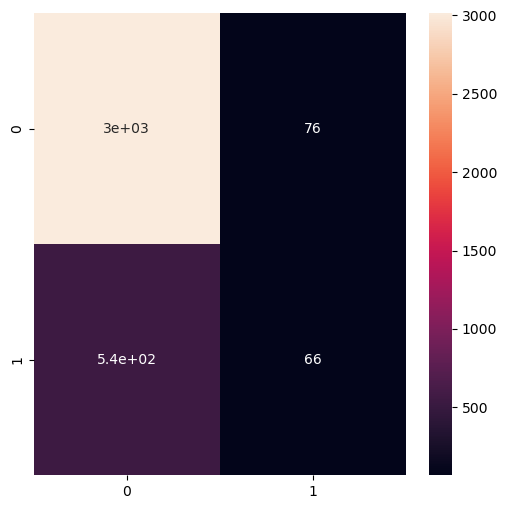

accuracy score : 0.8326574749932414
classification_report :               precision    recall  f1-score   support

           0       0.85      0.98      0.91      3090
           1       0.46      0.11      0.18       609

    accuracy                           0.83      3699
   macro avg       0.66      0.54      0.54      3699
weighted avg       0.78      0.83      0.79      3699

confusion_matrix : [[3014   76]
 [ 543   66]]


In [96]:
random_forest(X_train,y_train)

# with smotified data

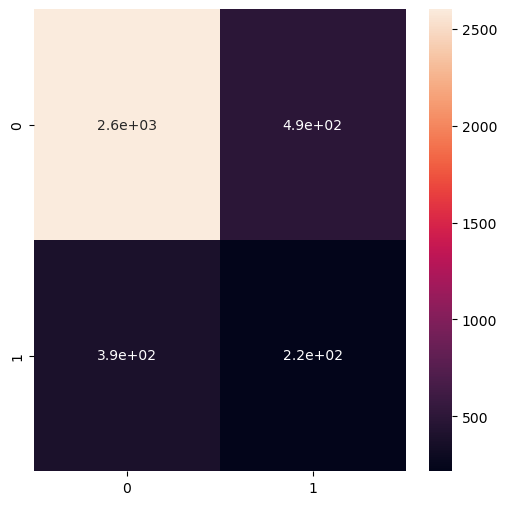

accuracy score : 0.7618275209516085
classification_report :               precision    recall  f1-score   support

           0       0.87      0.84      0.86      3090
           1       0.31      0.35      0.33       609

    accuracy                           0.76      3699
   macro avg       0.59      0.60      0.59      3699
weighted avg       0.78      0.76      0.77      3699

confusion_matrix : [[2602  488]
 [ 393  216]]


In [98]:
random_forest(X_train_resampled, y_train_resampled)

# logistic regression

In [100]:
def log_model(X_train,y_train,X_test):
    log_regressor=LogisticRegression()
    y_predict=log_regressor.fit(X_train,y_train).predict(X_test)
    evaluate_classifier(y_test,y_predict)
    return
    


# with normal data

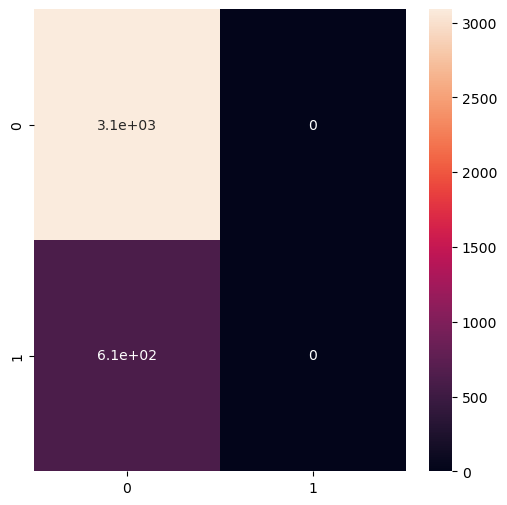

accuracy score : 0.8353609083536091
classification_report :               precision    recall  f1-score   support

           0       0.84      1.00      0.91      3090
           1       0.00      0.00      0.00       609

    accuracy                           0.84      3699
   macro avg       0.42      0.50      0.46      3699
weighted avg       0.70      0.84      0.76      3699

confusion_matrix : [[3090    0]
 [ 609    0]]


In [102]:
log_model(X_train,y_train,X_test)

# with smotified data

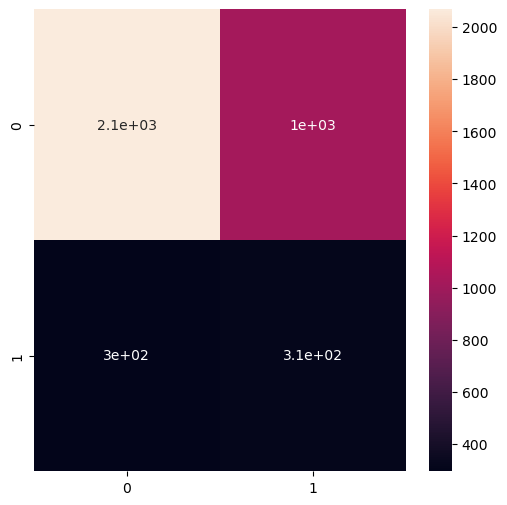

accuracy score : 0.6436874831035415
classification_report :               precision    recall  f1-score   support

           0       0.87      0.67      0.76      3090
           1       0.23      0.51      0.32       609

    accuracy                           0.64      3699
   macro avg       0.55      0.59      0.54      3699
weighted avg       0.77      0.64      0.69      3699

confusion_matrix : [[2068 1022]
 [ 296  313]]


In [104]:
log_model(X_train_resampled, y_train_resampled,X_test)

# with scaled normal data

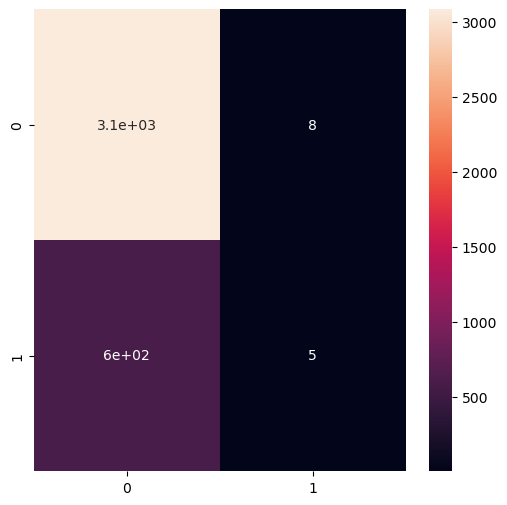

accuracy score : 0.8345498783454988
classification_report :               precision    recall  f1-score   support

           0       0.84      1.00      0.91      3090
           1       0.38      0.01      0.02       609

    accuracy                           0.83      3699
   macro avg       0.61      0.50      0.46      3699
weighted avg       0.76      0.83      0.76      3699

confusion_matrix : [[3082    8]
 [ 604    5]]


In [106]:
log_model(scaled_X_train, y_train,scaled_X_test)

# with smotified scaled data

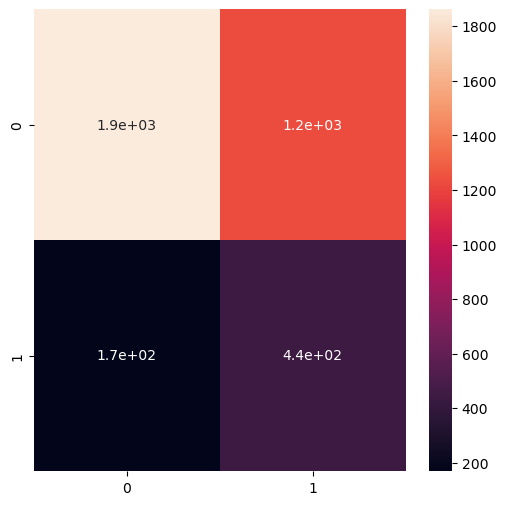

accuracy score : 0.622330359556637
classification_report :               precision    recall  f1-score   support

           0       0.92      0.60      0.73      3090
           1       0.26      0.72      0.39       609

    accuracy                           0.62      3699
   macro avg       0.59      0.66      0.56      3699
weighted avg       0.81      0.62      0.67      3699

confusion_matrix : [[1862 1228]
 [ 169  440]]


In [108]:
resampled_scaled_X_train, y_train_resampled = smote.fit_resample(scaled_X_train, y_train)
log_model(resampled_scaled_X_train, y_train_resampled,scaled_X_test)

 # KNN

In [110]:
def knn(X_train,y_train,X_test):
    knn=KNeighborsClassifier(n_neighbors =10)
    y_predict=knn.fit(X_train,y_train).predict(X_test)
    evaluate_classifier(y_test,y_predict)
    return
    

# with normal data

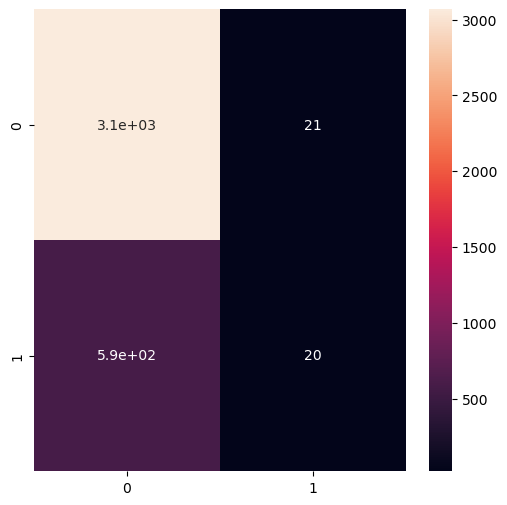

accuracy score : 0.8350905650175723
classification_report :               precision    recall  f1-score   support

           0       0.84      0.99      0.91      3090
           1       0.49      0.03      0.06       609

    accuracy                           0.84      3699
   macro avg       0.66      0.51      0.49      3699
weighted avg       0.78      0.84      0.77      3699

confusion_matrix : [[3069   21]
 [ 589   20]]


In [112]:
knn(X_train,y_train,X_test)

# with smotified data

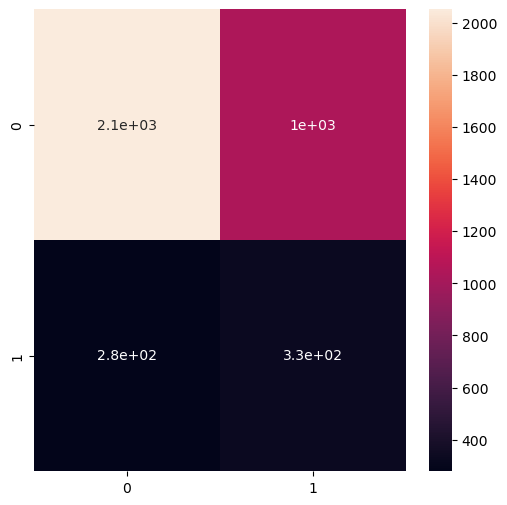

accuracy score : 0.6436874831035415
classification_report :               precision    recall  f1-score   support

           0       0.88      0.66      0.76      3090
           1       0.24      0.54      0.33       609

    accuracy                           0.64      3699
   macro avg       0.56      0.60      0.55      3699
weighted avg       0.78      0.64      0.69      3699

confusion_matrix : [[2051 1039]
 [ 279  330]]


In [114]:
knn(X_train_resampled, y_train_resampled,X_test)

# with scaled data

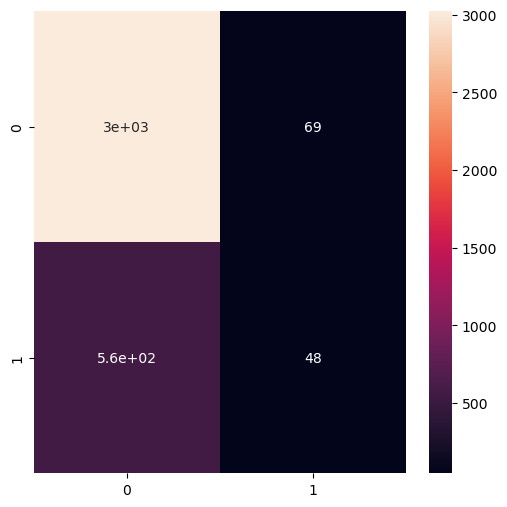

accuracy score : 0.829683698296837
classification_report :               precision    recall  f1-score   support

           0       0.84      0.98      0.91      3090
           1       0.41      0.08      0.13       609

    accuracy                           0.83      3699
   macro avg       0.63      0.53      0.52      3699
weighted avg       0.77      0.83      0.78      3699

confusion_matrix : [[3021   69]
 [ 561   48]]


In [116]:
knn(scaled_X_train, y_train,scaled_X_test)

# with smotified scaled data

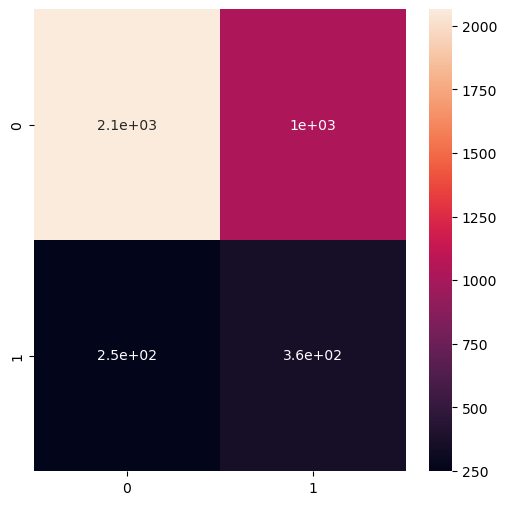

accuracy score : 0.6555825898891592
classification_report :               precision    recall  f1-score   support

           0       0.89      0.67      0.76      3090
           1       0.26      0.59      0.36       609

    accuracy                           0.66      3699
   macro avg       0.58      0.63      0.56      3699
weighted avg       0.79      0.66      0.70      3699

confusion_matrix : [[2065 1025]
 [ 249  360]]


In [118]:
knn(resampled_scaled_X_train, y_train_resampled,scaled_X_test)

# DECISION TREE CLASSIFIER

In [120]:
def dtree(X_train, y_train):
    tree_model=DecisionTreeClassifier()
    y_predict=tree_model.fit(X_train, y_train).predict(X_test)
    evaluate_classifier(y_test,y_predict)
    return
    

# on normal data

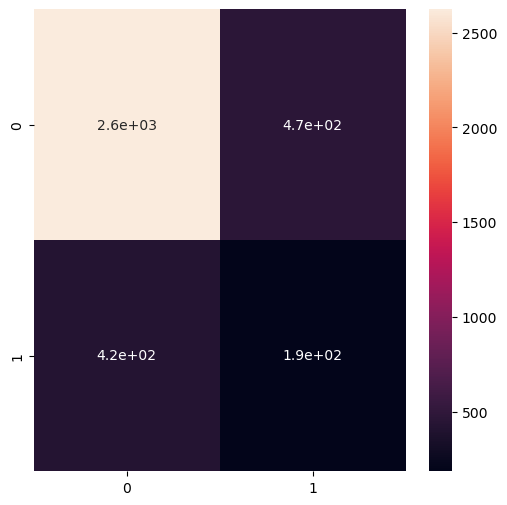

accuracy score : 0.7593944309272777
classification_report :               precision    recall  f1-score   support

           0       0.86      0.85      0.85      3090
           1       0.28      0.31      0.29       609

    accuracy                           0.76      3699
   macro avg       0.57      0.58      0.57      3699
weighted avg       0.77      0.76      0.76      3699

confusion_matrix : [[2623  467]
 [ 423  186]]


In [122]:
dtree(X_train, y_train)

# on smotified data

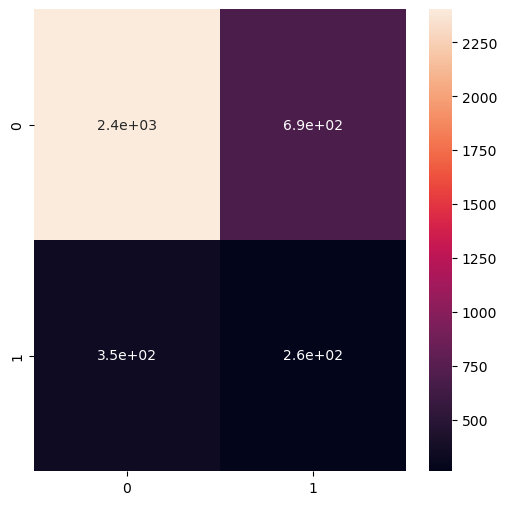

accuracy score : 0.72073533387402
classification_report :               precision    recall  f1-score   support

           0       0.87      0.78      0.82      3090
           1       0.28      0.43      0.34       609

    accuracy                           0.72      3699
   macro avg       0.58      0.60      0.58      3699
weighted avg       0.78      0.72      0.74      3699

confusion_matrix : [[2403  687]
 [ 346  263]]


In [124]:
dtree(X_train_resampled, y_train_resampled)

# support vector machiene

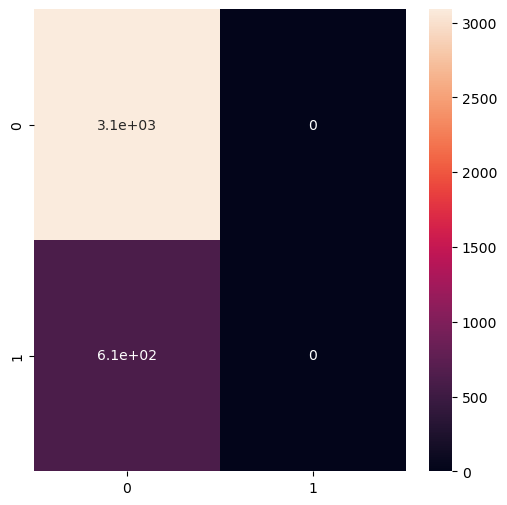

accuracy score : 0.8353609083536091
classification_report :               precision    recall  f1-score   support

           0       0.84      1.00      0.91      3090
           1       0.00      0.00      0.00       609

    accuracy                           0.84      3699
   macro avg       0.42      0.50      0.46      3699
weighted avg       0.70      0.84      0.76      3699

confusion_matrix : [[3090    0]
 [ 609    0]]


In [126]:
svm = SVC()
params_grid={"C":[0.01,0.1,1],"kernel":["linear","rbf"]}
grid=GridSearchCV(svm,params_grid)
grid.fit(scaled_X_train,y_train)
y_predict=grid.predict(scaled_X_test)
evaluate_classifier(y_test,y_predict)


In [127]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

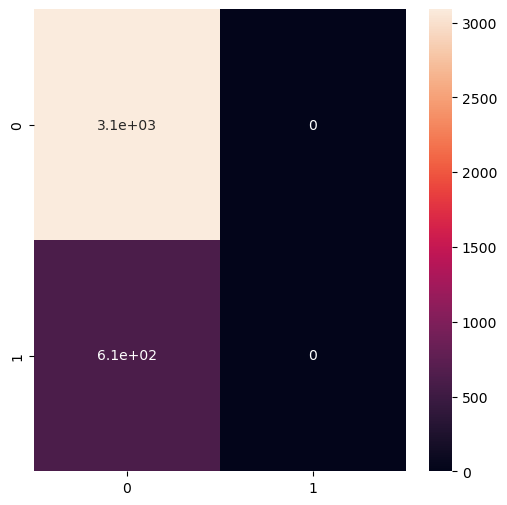

accuracy score : 0.8353609083536091
classification_report :               precision    recall  f1-score   support

           0       0.84      1.00      0.91      3090
           1       0.00      0.00      0.00       609

    accuracy                           0.84      3699
   macro avg       0.42      0.50      0.46      3699
weighted avg       0.70      0.84      0.76      3699

confusion_matrix : [[3090    0]
 [ 609    0]]


In [128]:
svm=SVC(C=0.01,kernel='linear')
y_predict=svm.fit(scaled_X_train,y_train).predict(scaled_X_test)
evaluate_classifier(y_test,y_predict)

# support vector classifier works well.

In [130]:
random_indices = np.random.choice(len(X_test), 5, replace=False)
random_samples = X_test.iloc[random_indices]
random_predictions = svm.predict(random_samples)

print("Random Samples Predictions:")
for i, index in enumerate(random_indices):
    print(f"Sample {i+1}: Predicted - {random_predictions[i]}, Actual - {y_test.iloc[index]}")

Random Samples Predictions:
Sample 1: Predicted - 0, Actual - 0
Sample 2: Predicted - 0, Actual - 0
Sample 3: Predicted - 0, Actual - 0
Sample 4: Predicted - 0, Actual - 0
Sample 5: Predicted - 0, Actual - 0
